In [ ]:
#Importig Libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
#Pre-processing for inputs
x_train=x_train/255.0

In [ ]:
#Pre-processing for outputs
y_train=pd.get_dummies(y_train)

In [ ]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
del model
# To delete the model in order to reset the weights and biases

In [ ]:
#modelling
#Layers:
#Input (784) neurons [because 28 x 28 pixels are there so no. of features =784]
#Hidden Layer (128) its and hyperparameter so choosing the correct no. of nwurons is done by trial and testing
#Output Layer (10) because there are 10 digits

In [ ]:
# There are 2 types of models :
# 1 Sequential
#2 Function
# We are going to use a sequetial model

# Creating an empty sequential keras model
model = tf.keras.models.Sequential()
#Add first layer :
model.add(tf.keras.layers.Input((28,28),name ='Input_Layer'))

#Flattening Layer : (This is rfequired so that our 2d image can be converted into 1D as all layers are 1D)

model.add(tf.keras.layers.Flatten(name='Flatten_Layer'))

# This will convert the image into columns and all columns would be stacked after another(eg C1,C2...C28)
#Hidden Layer1 :
model.add(tf.keras.layers.Dense(units=256,activation = tf.keras.activations.relu, name='Hidden_Layer1'))

#Hidden Layer2:
#     model.add(tf.keras.layers.Dense(units=64,activation = tf.keras.activations.relu, name='Hidden_Layer2'))

#Output Layer :
model.add(tf.keras.layers.Dense(units=10, activation= tf.keras.activations.softmax,name='Output_Layer'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_Layer (Flatten)     (None, 784)               0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 256)               200960    
                                                                 
 Output_Layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#?tf.keras.layers.Dense

In [ ]:
#ParamH = 100480 means ( 784*128 +128 ) which is w*x +b
#ParamO = 1290 means (128*10 +10)  which is w*x +b
# Toal Param = 10480 +1290 = 101770

In [ ]:
#Compiling Model by mentioning Optimizer in which learning rate and its algorithm is decided,
# And also the losses is determnined and the metrics we want to see is stated here we use Accuracy
#RMS_prop
'''
loss_fn=loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer,loss=loss_fn,metrics=['acc'])
'''
#Adadelta
loss_fn=loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01)
model.compile(optimizer=optimizer,loss=loss_fn,metrics=['acc'])
'''
ADAM Optimizer:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['acc'])
'''
'''
basic method:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,
                                                loss=tf.keras.losses.categorical_crossentropy,
                                                metrics=['acc'])
'''

"\nbasic method:\nmodel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,\n                                                loss=tf.keras.losses.categorical_crossentropy,\n                                                metrics=['acc'])\n"

In [ ]:
#Fit Model
#Basic:
#model.fit(x_train,y_train,epochs=33,batch_size=32,validation_split=0.1)
#CallBack:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=14),
    tf.keras.callbacks.TensorBoard(log_dir='logs/'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=14)
]
model.fit(x_train, y_train, epochs=50, callbacks=callbacks,validation_split=0.1)


Epoch 1/50
1688/1688 [==============================] - 12s 7ms/step - loss: 1.4742 - acc: 0.6577 - val_loss: 0.8389 - val_acc: 0.8682
Epoch 2/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.7034 - acc: 0.8524 - val_loss: 0.5056 - val_acc: 0.9007
Epoch 3/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.5178 - acc: 0.8767 - val_loss: 0.4013 - val_acc: 0.9105
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4432 - acc: 0.8882 - val_loss: 0.3511 - val_acc: 0.9173
Epoch 5/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4016 - acc: 0.8960 - val_loss: 0.3206 - val_acc: 0.9210
Epoch 6/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3743 - acc: 0.9012 - val_loss: 0.3003 - val_acc: 0.9238
Epoch 7/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3543 - acc: 0.9054 - val_loss: 0.2851 - val_acc: 0.9253
Epoch 8/50
1688/1688 [==============================] -

Text(0.5, 1.0, 'Accuracy of Model')

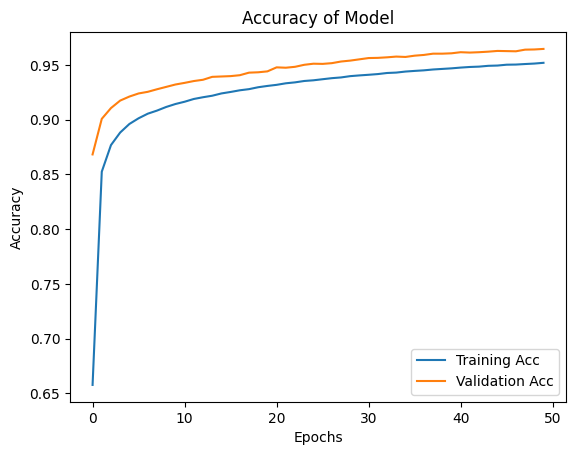

In [ ]:
#Plotting Acc vs Val Graph
plt.plot(model.history.history['acc'],label='Training Acc')
plt.plot(model.history.history['val_acc'],label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")

Text(0.5, 1.0, 'Losses of Model')

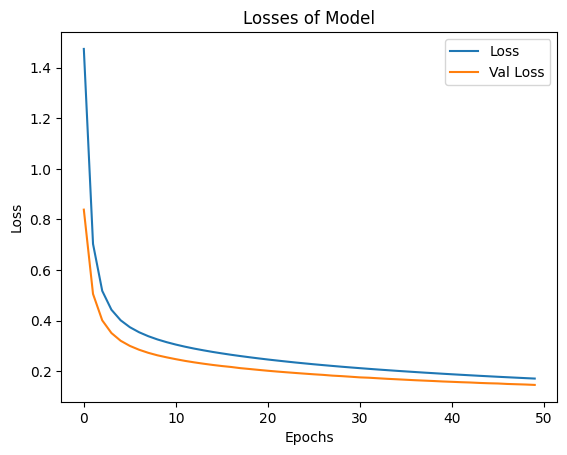

In [ ]:
#Plotting Losses (In DL We focus on Losses over accuracy)
plt.plot(model.history.history['loss'],label='Loss')
plt.plot(model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses of Model')

In [ ]:
model.get_weights()[0].shape #weights of hidden layer which combines to have 100480 params

(784, 128)

In [ ]:
model.get_weights()[1].shape  #Weights of Output layer which comines to have 1290 params

(128,)

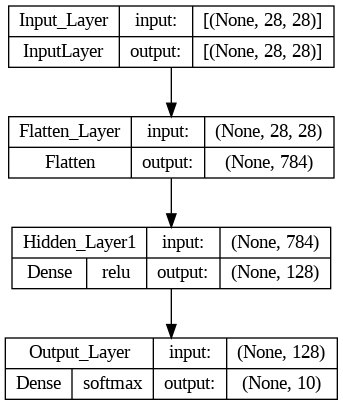

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True) #show layers wont work here read documentation